# <font color='Purple' face='cursive'><center> Sentiment Analysis </center></font>

<font color='Green' face='Comic Sans MS' style="font-size:15px;">Sentiment analysis is the process of using natural language processing, text analysis, and statistics to analyze customer sentiment. The best businesses understand the sentiment of their customers—what people are saying, how they’re saying it, and what they mean. </font><br><br>
<font color='Blue' face='Comic Sans MS' style="font-size:14px;">Customer sentiment can be found in tweets, comments, reviews, or other places where people mention your brand. Sentiment Analysis is the domain of understanding these emotions with software, and it’s a must-understand for developers and business leaders in a modern workplace.</font>

In [1]:
# Import Libraries 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Sentiment Analysis
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from textblob import TextBlob
from nltk.util import ngrams
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# Read Data sets into the notebook
trump_df = pd.read_csv(r"hashtag_donaldtrump.csv",lineterminator='\n')

biden_df = pd.read_csv(r"hashtag_joebiden.csv",lineterminator='\n')

In [3]:
# Check shape of both data frames

print(trump_df.shape)

print(biden_df.shape)

(970919, 21)
(776886, 21)


In [4]:
# Check Info of both data sets 
print(trump_df.info())

print(biden_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970919 entries, 0 to 970918
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   created_at            970919 non-null  object 
 1   tweet_id              970919 non-null  float64
 2   tweet                 970919 non-null  object 
 3   likes                 970919 non-null  float64
 4   retweet_count         970919 non-null  float64
 5   source                970043 non-null  object 
 6   user_id               970919 non-null  float64
 7   user_name             970903 non-null  object 
 8   user_screen_name      970919 non-null  object 
 9   user_description      869653 non-null  object 
 10  user_join_date        970919 non-null  object 
 11  user_followers_count  970919 non-null  float64
 12  user_location         675966 non-null  object 
 13  lat                   445719 non-null  float64
 14  long                  445719 non-null  float64
 15  

Lets concat both dataframes for easier Analysis using [pandas concat function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [5]:
# Adding a new column to differentiate between tweets of Biden and Trump
trump_df["Candidate"] = "TRUMP"
biden_df["Candidate"] = "BIDEN"

In [6]:
# Concat the data frames
Data_Mixed = pd.concat([trump_df,biden_df])
Data_Mixed.sort_values(by='created_at')
Data_Mixed.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,Candidate
0,2020-10-15 00:00:01,1.316529e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,3.606665e+08,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa...,...,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00,TRUMP
1,2020-10-15 00:00:01,1.316529e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,3.316176e+08,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530,TRUMP
2,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP
3,2020-10-15 00:00:02,1.316529e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.283556e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591,TRUMP
4,2020-10-15 00:00:08,1.316529e+18,You get a tie! And you get a tie! #Trump ‘s ra...,4.0,3.0,Twitter for iPhone,4.741380e+07,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP


Lets check the number of tweets received for each of them using [barplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html)

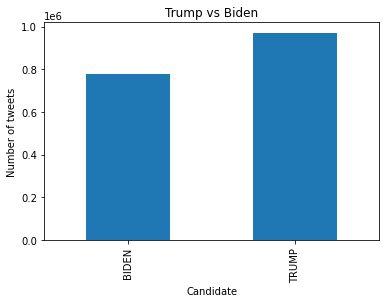

In [7]:
# Plot the number of tweets for each candidate
Data_Mixed.groupby('Candidate')['tweet'].count().plot.bar()
plt.ylabel('Number of tweets')
plt.title('Trump vs Biden')
plt.show()

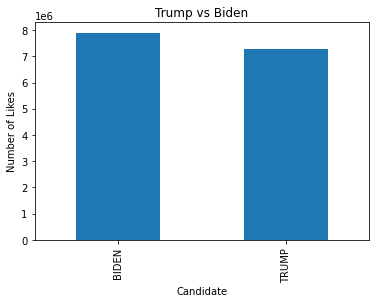

In [8]:
# Comparison of likes
Data_Mixed.groupby('Candidate')['likes'].sum().plot.bar()
plt.ylabel('Number of Likes')
plt.title('Trump vs Biden')
plt.show()

 - Even though The number of tweets for Trump are high but the number of likes are high for BIDEN showing that there are was more talk about biden than trump

In [9]:
Data_Mixed.country.value_counts()

United States of America    332495
United States                61905
United Kingdom               58051
India                        40091
Germany                      35379
                             ...  
Tonga                            2
Saint Lucia                      1
Lesotho                          1
East Timor                       1
Northern Mariana Islands         1
Name: country, Length: 189, dtype: int64

United States and United States of America are Same so using same literal US for both of them using [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

In [10]:
Data_Mixed['country']=Data_Mixed['country'].replace({"United States of America" : "US", "United States" : "US"})

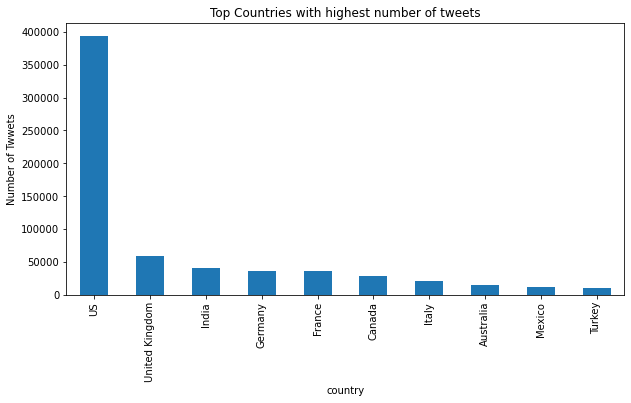

In [11]:
# Countries with highest number of tweets
plt.figure(figsize=(10,5))
Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel('Number of Twwets')
plt.title('Top Countries with highest number of tweets')
plt.show()

 - As Expected more Tweets are from US, as elections are being conducted there

In [12]:
# List of top 10 countries with highest number of tweets
top10Countries = Data_Mixed.groupby('country')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [13]:
# Twwets for Biden and Trump from each country
tweet_df = Data_Mixed.groupby(['country','Candidate'])['tweet'].count().reset_index()

tweet_df = tweet_df[tweet_df['country'].isin(top10Countries)]

tweet_df

,country,Candidate,tweet
16,Australia,BIDEN,5534
17,Australia,TRUMP,9365
54,Canada,BIDEN,10809
55,Canada,TRUMP,16996
112,France,BIDEN,14610
113,France,TRUMP,20689
118,Germany,BIDEN,12761
119,Germany,TRUMP,22618
146,India,BIDEN,21532
147,India,TRUMP,18559


 Lets check the comparison of tweets for Biden and Trumo for the top countries using [barplot](http://seaborn.pydata.org/generated/seaborn.barplot.html)

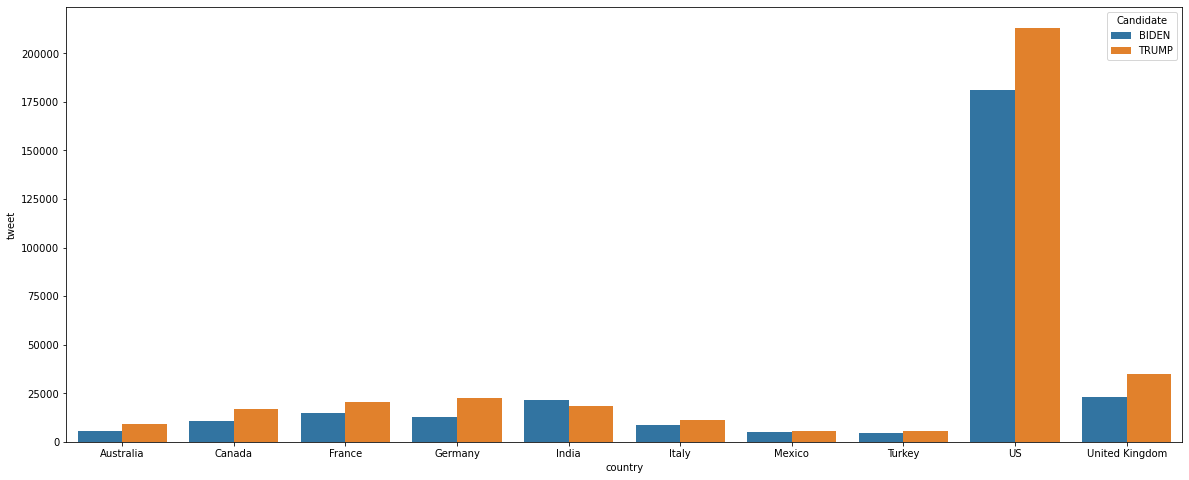

In [14]:
#Plot top 10 countries with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=tweet_df,x='country',y='tweet',hue='Candidate')
plt.show()

 - Except in India Most of the countries tweets more about Trump

Lets drill down and check tweets in states and on whom most tweets are based on

In [15]:
# List of top 10 states with highest number of tweets
top10States = Data_Mixed.groupby('state')['tweet'].count().sort_values(ascending=False).head(10).index.tolist()

In [16]:
# Twwets for Biden and Trump from each state in top10 states
state_df = Data_Mixed.groupby(['state','Candidate'])['tweet'].count().reset_index()

state_df = state_df[state_df['state'].isin(top10States)]

state_df

,state,Candidate,tweet
206,California,BIDEN,25817
207,California,TRUMP,31149
349,District of Columbia,BIDEN,7055
350,District of Columbia,TRUMP,9684
386,England,BIDEN,16743
387,England,TRUMP,24111
410,Florida,BIDEN,13284
411,Florida,TRUMP,16568
518,Ile-de-France,BIDEN,7001
519,Ile-de-France,TRUMP,9393


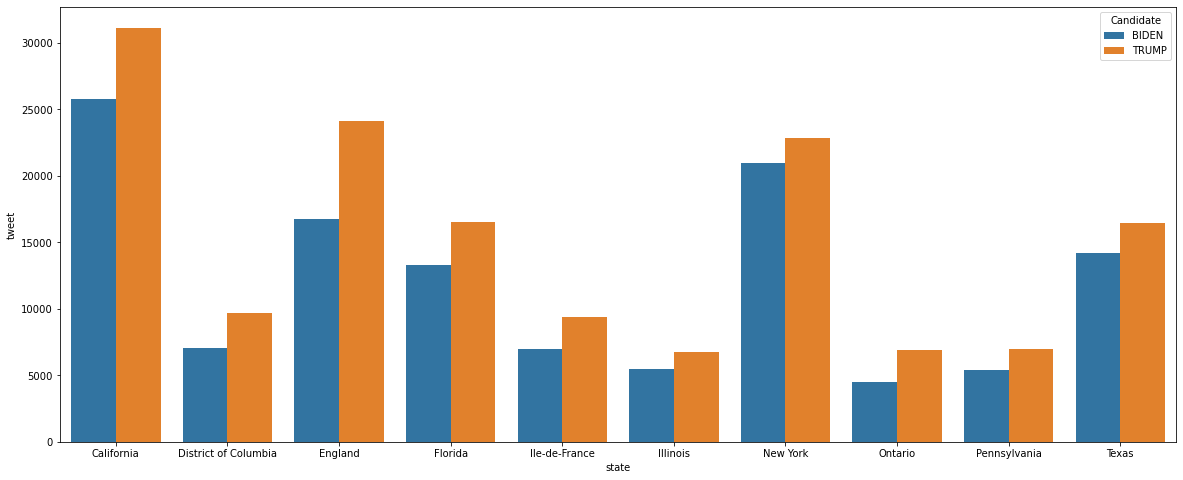

In [17]:
#Plot top 10 states with highest number of tweets for trump and biden
plt.figure(figsize=(20,8))
sns.barplot(data=state_df,x='state',y='tweet',hue='Candidate')
plt.show()

 - Even here the tweets are more for trump than Biden

## Sentiment Analysis of Presidential Elections

We will be considering sentiments of only US people here as they are the major factor that decide the president of United States

In [18]:
def clean(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'@[A-Za-z0-9]+','',text)
    text=re.sub(r'#','',text)
    text=re.sub(r'RT[\s]+','',text)
    text=re.sub(r'[^\w]', ' ', text)
    return text

In [19]:
# create fuction to get the subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score==0:
        return 'neutral'
    else:
        return 'positive'

## DonaldTrump tweets sentiment analysis

In [26]:
Trump_Tweets = Data_Mixed.query('(Candidate == "TRUMP")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Trump_Tweets = Trump_Tweets.dropna().loc[Trump_Tweets.country == 'US']

Trump_Tweets.reset_index(inplace = True, drop = True)

Trump_Tweets['ClearTweet'] = Trump_Tweets['tweet'].apply(clean)

Trump_Tweets['subjectivity']= Trump_Tweets['ClearTweet'].apply(getSubjectivity)
Trump_Tweets['polarity']    = Trump_Tweets['ClearTweet'].apply(getPolarity)
Trump_Tweets['analysis']    = Trump_Tweets['polarity'].apply(getAnalysis)


Trump_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,"Without a doubt, the #FourSeasons debacle is t...",US,without a doubt the fourseasons debacle is th...,0.483333,0.333333,positive
1,"President Donald #Trump’s youngest daughter, T...",US,president donald trump s youngest daughter ti...,0.000000,0.000000,neutral
2,Woah. Have you read this article?\n\nAll the p...,US,woah have you read this article all the presi...,0.000000,0.000000,neutral
3,The latest episode of #SNL tackled #DonaldTrum...,US,the latest episode of snl tackled donaldtrump ...,0.800000,-0.033333,negative
4,🇺🇸 #Decision2020: @JoeBiden firmará una serie ...,US,firmará una serie de órdenes ejecutivas ...,0.000000,0.000000,neutral


In [30]:
Trump_Tweets.analysis.value_counts(normalize=True)*100

neutral     43.694396
positive    36.258595
negative    20.047009
Name: analysis, dtype: float64

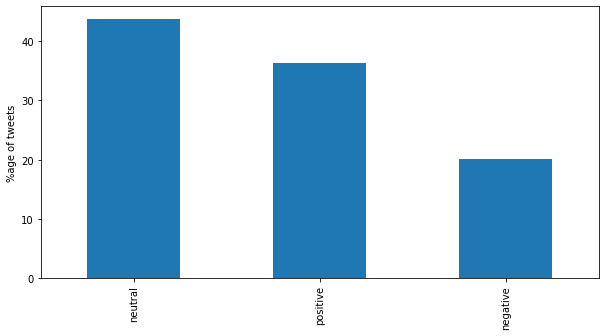

In [29]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Trump_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

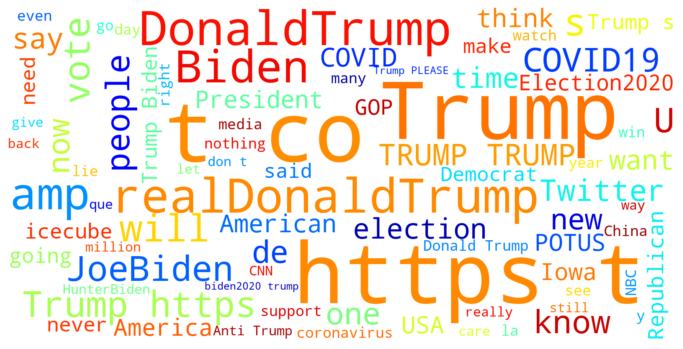

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(trump_df['tweet'][:5000])

## JoeBiden tweets sentiment analysis

In [25]:
Biden_Tweets = Data_Mixed.query('(Candidate == "BIDEN")').sort_values('user_followers_count',ascending = False).drop_duplicates(['user_name'])[['tweet','country']]
Biden_Tweets = Biden_Tweets.dropna().loc[Biden_Tweets.country == 'US']


Biden_Tweets.reset_index(inplace = True, drop = True)

Biden_Tweets['ClearTweet'] = Biden_Tweets['tweet'].apply(clean)

 
Biden_Tweets['subjectivity']= Biden_Tweets['ClearTweet'].apply(getSubjectivity)
Biden_Tweets['polarity']    = Biden_Tweets['ClearTweet'].apply(getPolarity)
Biden_Tweets['analysis']    = Biden_Tweets['polarity'].apply(getAnalysis)
Biden_Tweets.head()


Biden_Tweets.head()

,tweet,country,ClearTweet,subjectivity,polarity,analysis
0,#JoeBiden is enlisting A-list star power to he...,US,joebiden is enlisting a list star power to hel...,0.00,0.00,neutral
1,While we were campaigning across battleground ...,US,while we were campaigning across battleground ...,0.75,0.80,positive
2,The big fight TODAY!!!!! @realDonaldTrump vs #...,US,the big fight today vs joebiden who you ...,0.10,0.00,neutral
3,News outlets have projected that #JoeBiden has...,US,news outlets have projected that joebiden has ...,0.00,0.00,neutral
4,"During his victory speech, #JoeBiden said he u...",US,during his victory speech joebiden said he un...,0.75,-0.75,negative


In [32]:
Biden_Tweets.analysis.value_counts(normalize=True)*100

neutral     45.353606
positive    40.000000
negative    14.646394
Name: analysis, dtype: float64

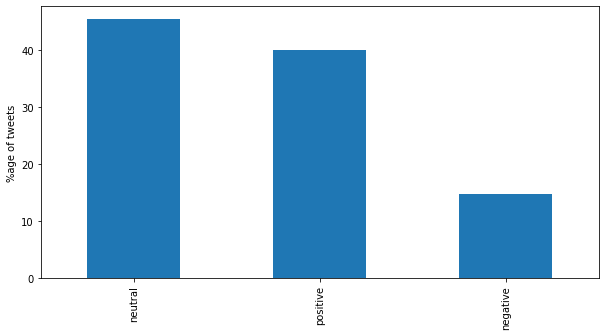

In [31]:
# Plot graph for analysis of Trump Tweets
plt.figure(figsize=(10,5)) 
(Biden_Tweets.analysis.value_counts(normalize=True)*100).plot.bar()
plt.ylabel("%age of tweets")
plt.show()

Just Comparing the positive and negative tweets itself shows that Biden was favourite for winning presidential elections

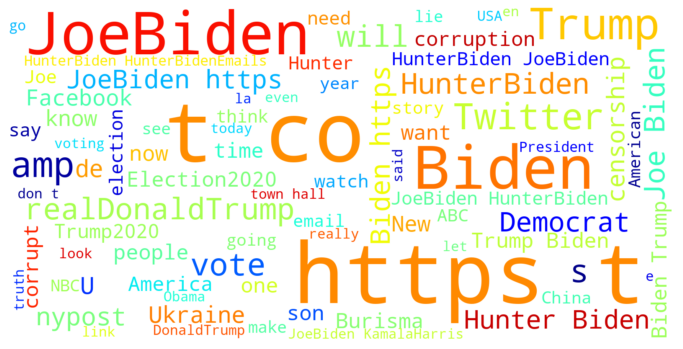

In [33]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join([text for text in wd_list])
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        width=1600,
        height=800,
        random_state=1,
        colormap='jet',
        max_words=80,
        max_font_size=200).generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation="bilinear");
word_cloud(biden_df['tweet'][0:5000])

According to Sentiment Analysis, Biden has upper hand over Trump in US which actually matters in presidential elections